## **1. Import Libararies**<a id="Step-7"></a>

In [4]:
# Import Core Libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px

# Import Scalers and Encoders
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Enable Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Train-Test Split
from sklearn.model_selection import train_test_split

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# Classification Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Optional: XGBoost and LightGBM
try:
    from xgboost import XGBRegressor
except ImportError:
    print("XGBoost not installed. Run: pip install xgboost")

try:
    from lightgbm import LGBMRegressor
except ImportError:
    print("LightGBM not installed. Run: pip install lightgbm")

# Pipelines & Tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

# Evaluation Metrics
from sklearn.metrics import (
    mean_squared_error, r2_score, mean_absolute_error,
    accuracy_score, precision_score, recall_score, f1_score
)

# TensorFlow / Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


XGBoost not installed. Run: pip install xgboost
LightGBM not installed. Run: pip install lightgbm


## **8. Load the training, Testing and submission Data**<a id="Step-8"></a>

In [6]:
# Load the Training Data
df_train = pd.read_csv(r'D:\house prize prediction using deep neural network\train.csv')

# Load the Testing Data
df_test = pd.read_csv(r'D:\house prize prediction using deep neural network\test.csv')

# Load the Submission Data
submission = pd.read_csv(r'D:\house prize prediction using deep neural network\sample_submission.csv')


In [7]:
# Lets check the First Five Rows of Training Data (df_train)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# Lets check the First Five Rows of Testing Data(df_test) 
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
# Lets check the First Five Rows of submission 
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


## **9. Lets Explore the Training Data (df_train.csv)**<a id="Step-9"></a>

In [10]:
# Copy the Training Dataset
df=df_train.copy()

### **9.1. Training Data (df_train) Structure**<a id="Step-9.1"></a>

In [11]:
# Training df structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### **9.2. Training Data (df_train) Shape**<a id="Step-9.2"></a>

In [12]:
# Training Data Shape
df.shape

(1460, 81)

### **9.3. Lets check the columns having object and category datatype**<a id="Step-9.3"></a>

In [13]:
# Lets check the columns having categorical and object Datatype
# Initialize a counter for numeric columns
cat_columns = 0

# Iterate over column names and check data types
for column in df.columns:
    if df[column].dtype in ['category', 'object']:
        cat_columns += 1

# Print the total number of numeric columns
print("Total catorical columns:", cat_columns)

Total catorical columns: 43


In [14]:
# Categorical columns in the Training Data
cat_columns=df.select_dtypes(include=['category','object']).columns
cat_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### **9.4. Lets check the columns having int and Float datatype**<a id="Step-9.4"></a>

In [15]:
# Lets check the Number of columns Having int or Float Datatype
# Initialize a counter for numeric columns
numeric_columns = 0

# Iterate over column names and check data types
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        numeric_columns += 1

# Print the total number of numeric columns
print("Total numeric columns:", numeric_columns)

Total numeric columns: 38


In [16]:
# Numerical columns( having int or Float datatype)
df.select_dtypes(include=['float','int']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### `Observations:`
>* Training Dataset (df_train) consists of 1460 entries and 81 columns
>* Training Dataset (df_train) consists of 38 Numeric columns
>* Training Dataset  (df_train) consists of 48 categorical columns

In [17]:
# Display Maximum Rows and columns of Training Data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id="Step-10"></a>
<span style="font-weight: bold; color: Red; font-size: 35px;">10. Missing values of Training Data (df_train) </span>

In [18]:
# Lets Check the Missing values percentage present in the Training Data
df.isnull().sum().sort_values(ascending=False)/len(df)*100

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

### **10.1. Lets Make the Null values plot**<a id="Step-10.1"></a>


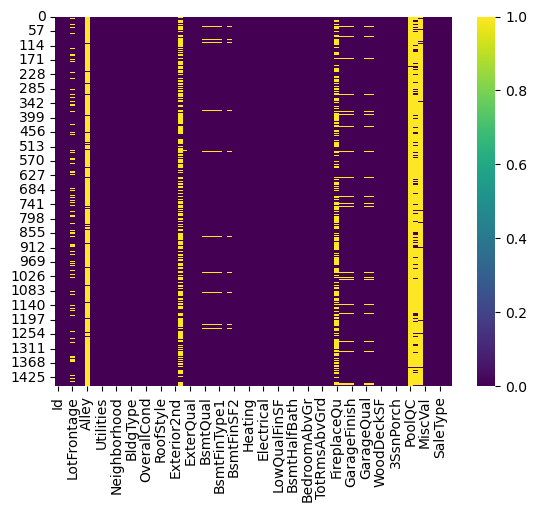

In [19]:
# Missing Values plot
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

In [20]:
# Missing Data columns
missing_data_cols=df.isnull().sum()[df.isnull().sum()>0].index.tolist()
missing_data_cols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [21]:
# Separate the Categorical, Boolean and Numeric Datatype
cat_cols=['Alley',  'MiscFeature', 'Fence', 'MasVnrType', 'FireplaceQu']
bool_cols=[]
numeric_cols=['LotFrontage']

#### `credit:` Function to impute Missing values

https://www.kaggle.com/code/usm811/awesome-technique-to-impute-high-missing-data

<a id="Step-10.2"></a>
<span style="font-weight: bold; color: Red; font-size: 35px;">10.2. Function to Impute Missing values of Training Data (df_train) </span>

In [23]:
def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [19]:
# Lets check the Missing Values are imputed 
for cols in missing_data_cols:
    print('missing_values', cols, ':', str(round(df.isnull().sum()/len(df)*100, 2))+'%')
    if cols in cat_cols:
        df[cols] = impute_categorical_missing_data(cols)
    elif cols in numeric_cols:
        df[cols] = impute_continuous_missing_data(cols)
    else:
        pass

missing_values LotFrontage : Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType       59.73
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Elect

In [24]:
# Drop the PoolQC column
df.dropna(subset=['PoolQC'], inplace=True)

In [25]:
# Lets check again that the Missing Values are imputed or not
df.isnull().sum().sort_values(ascending=False)

Alley            7
MiscFeature      6
MasVnrType       4
LotFrontage      1
Fence            1
Id               0
KitchenAbvGr     0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
FullBath         0
BedroomAbvGr     0
HalfBath         0
GarageFinish     0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
GarageYrBlt      0
GarageArea       0
GarageCars       0
Electrical       0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolQC           0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
1stFlrSF         0
HeatingQC        0
CentralAir       0
Neighborhood     0
YearBuilt        0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
LandSlope   

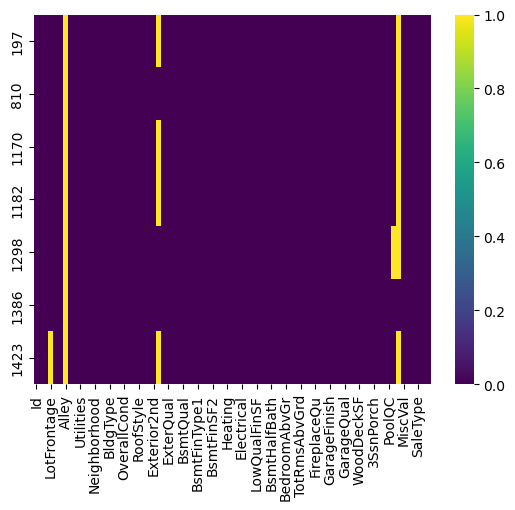

In [26]:
# Lets Make the plot of the Null values to check whether the null values are imputed or not
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

<a id="Step-10.3"></a>
<span style="font-weight: bold; color: Red; font-size: 35px;">10.3. Missing values of Testing Data(df_test) </span>

In [27]:
# Missing columns of Testing Data(df_test)
missing_df_test_cols=missing_data_cols=df_test.isnull().sum()[df_test.isnull().sum()>0].index.tolist()
missing_data_cols


['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [28]:
# Missing values of Testing Data(df_test)
df_test.isnull().sum().sort_values(ascending=False)/len(df_test)*100

PoolQC           99.794380
MiscFeature      96.504455
Alley            92.666210
Fence            80.123372
MasVnrType       61.274846
FireplaceQu      50.034270
LotFrontage      15.558602
GarageYrBlt       5.346127
GarageQual        5.346127
GarageFinish      5.346127
GarageCond        5.346127
GarageType        5.209047
BsmtCond          3.084304
BsmtQual          3.015764
BsmtExposure      3.015764
BsmtFinType1      2.878684
BsmtFinType2      2.878684
MasVnrArea        1.028101
MSZoning          0.274160
BsmtHalfBath      0.137080
Utilities         0.137080
Functional        0.137080
BsmtFullBath      0.137080
BsmtFinSF1        0.068540
BsmtFinSF2        0.068540
BsmtUnfSF         0.068540
KitchenQual       0.068540
TotalBsmtSF       0.068540
Exterior2nd       0.068540
GarageCars        0.068540
Exterior1st       0.068540
GarageArea        0.068540
SaleType          0.068540
MiscVal           0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
YrSold            0.000000
T

<a id="Step-10.4"></a>
<span style="font-weight: bold; color: Red; font-size: 35px;">10.4. Function to Impute Missing values of Testing Data (df_test)👓 </span>

In [29]:
def impute_categorical_missing_df_test(passed_col):
    
    df_test_null = df_test[df_test[passed_col].isnull()]
    df_test_not_null = df_test[df_test[passed_col].notnull()]

    X = df_test_not_null.drop(passed_col, axis=1)
    y = df_test_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_test_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_test_null) > 0: 
        df_test_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_test_null[passed_col] = df_test_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_test_not_null, df_test_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_df_test(passed_col):
    
    df_test_null = df_test[df_test[passed_col].isnull()]
    df_test_not_null = df_test[df_test[passed_col].notnull()]

    X = df_test_not_null.drop(passed_col, axis=1)
    y = df_test_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_test_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_test_null) > 0: 
        df_test_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_test_not_null, df_test_null])
    
    return df_combined[passed_col]

In [30]:
for cols in missing_df_test_cols:
    print('missing_values', cols, ':', str(round(df_test.isnull().sum()/len(df)*100, 2))+'%')
    if cols in cat_cols:
        df_test[cols] = impute_categorical_missing_df_test(cols)
    elif cols in numeric_cols:
        df_test[cols] = impute_continuous_missing_df_test(cols)
    else:
        pass

missing_values MSZoning : Id                   0.00
MSSubClass           0.00
MSZoning            57.14
LotFrontage       3242.86
LotArea              0.00
Street               0.00
Alley            19314.29
LotShape             0.00
LandContour          0.00
Utilities           28.57
LotConfig            0.00
LandSlope            0.00
Neighborhood         0.00
Condition1           0.00
Condition2           0.00
BldgType             0.00
HouseStyle           0.00
OverallQual          0.00
OverallCond          0.00
YearBuilt            0.00
YearRemodAdd         0.00
RoofStyle            0.00
RoofMatl             0.00
Exterior1st         14.29
Exterior2nd         14.29
MasVnrType       12771.43
MasVnrArea         214.29
ExterQual            0.00
ExterCond            0.00
Foundation           0.00
BsmtQual           628.57
BsmtCond           642.86
BsmtExposure       628.57
BsmtFinType1       600.00
BsmtFinSF1          14.29
BsmtFinType2       600.00
BsmtFinSF2          14.29
BsmtUnfSF   

In [31]:
df_test.isnull().sum().sort_values(ascending=False)

PoolQC           1456
GarageFinish       78
GarageYrBlt        78
GarageQual         78
GarageCond         78
GarageType         76
BsmtCond           45
BsmtExposure       44
BsmtQual           44
BsmtFinType2       42
BsmtFinType1       42
MasVnrArea         15
MSZoning            4
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
Functional          2
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
KitchenQual         1
Exterior2nd         1
BsmtFinSF1          1
Exterior1st         1
GarageCars          1
SaleType            1
GarageArea          1
MiscFeature         0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
YrSold              0
MoSold              0
MiscVal             0
Fence               0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
Fireplaces          0
FireplaceQu         0
WoodDeckSF          0
PavedDrive

### **Handling Missing values :**
>* Firstly I Separate the Numeric (Having the int and Float Datatype) and Categorical columns (having object and category Datatype)
>* Then I check How many Missing values are present in the Training Dataset(df_train)
>* Then check the Columns which have Missing Values 
>* Then I created a Function to Impute The Missing Values of the categorical and Numeric columns of the Training Dataset(df_train)
>* Then by making the plot of Null values and by using the command df.isnull().sum().sort_values(ascending=True)
>* As the Missing Values Percentage in The Training Data is 99.520548 so I decided to Drop that Column
>* Then Then I created a Function to Impute The Missing Values of the categorical and Numeric columns of the Testing Dataset(df_test)
>* Then by using the command df_test.isnull().sum().sort_values(ascending=True)


<a id="Step-11"></a>
<span style="font-weight: bold; color: Red; font-size: 35px;">11. Lets Check Duplicates of Training and Testing Data </span>

In [32]:
# Assuming df is your DataFrame
duplicates_present = df.duplicated().any()

if duplicates_present:
    print("Duplicates are present in the DataFrame in Training Data")
else:
    print("No duplicates found in the DataFrame in Training Dta")

No duplicates found in the DataFrame in Training Dta


In [33]:
# Assuming df_test is your DataFrame
df_test_duplicates_present = df_test.duplicated().any()

if df_test_duplicates_present:
    print("Duplicates are present in the DataFrame in Testing Data")
else:
    print("No duplicates found in the DataFrame in Testing Data")

No duplicates found in the DataFrame in Testing Data


### **Observations:**
>* No Duplicates present in the Training and Testing Data

<a id="Step-12"></a>
<span style="font-weight: bold; color: Red; font-size: 35px;">12. Exploratory Data Analysis (EDA)😎

### **12.1. Lets Explore the Street Column**<a id="Step-12.1"></a>

In [34]:
df['Street'].value_counts()

Street
Pave    7
Name: count, dtype: int64

### `Observation:`
>* The street Type of road access is pave according to df_train.

### **12.2. Lets Explore Alley column**<a id="Step-12.2"></a>
`"Alley" refers to the type of pathway or road that leads to the back of a house. It's like a small street behind the house.`
- `"Grvl"` means it's made of gravel.
- `"Pave"` means it's paved, or "NA" which means there is no pathway.

In [35]:
df['Alley'].value_counts()

Series([], Name: count, dtype: int64)

### `Observations:`
>* There are 5 pave Alley according to df_train
>* 2 Grvl Alley according to df_train

### **12.3. Lets Explore the lot shape column**<a id="Step-12.3"></a>
* `"Reg":lot shape is "Regular."`
* `"IR1":lot shape is "Slightly irregular."`
* `"IR3":lot shape is "Moderately irregular."`

In [37]:
df['LotShape'].value_counts()

LotShape
Reg    3
IR1    3
IR3    1
Name: count, dtype: int64

### **Observations:**
>* 3 lotshape is Regular (Reg) according to df_train
>* 3 lotshape is Slightly irregular (IR2) according to df_train
>* 1 lotshape is Moderately irregular (IR3) according to df_train

### **12.4. Lets Explore the Utilities column**<a id="Step-12.4"></a>
* `utility services are described as "AllPub."`
* ` "AllPub" typically indicates that all public utilities, such as electricity, gas, water, and sewer services, are available to the property.`

In [38]:
df['Utilities'].value_counts()

Utilities
AllPub    7
Name: count, dtype: int64

### `Observations:`
>* There are 7 AllPub Utilities are availiable according to df_train

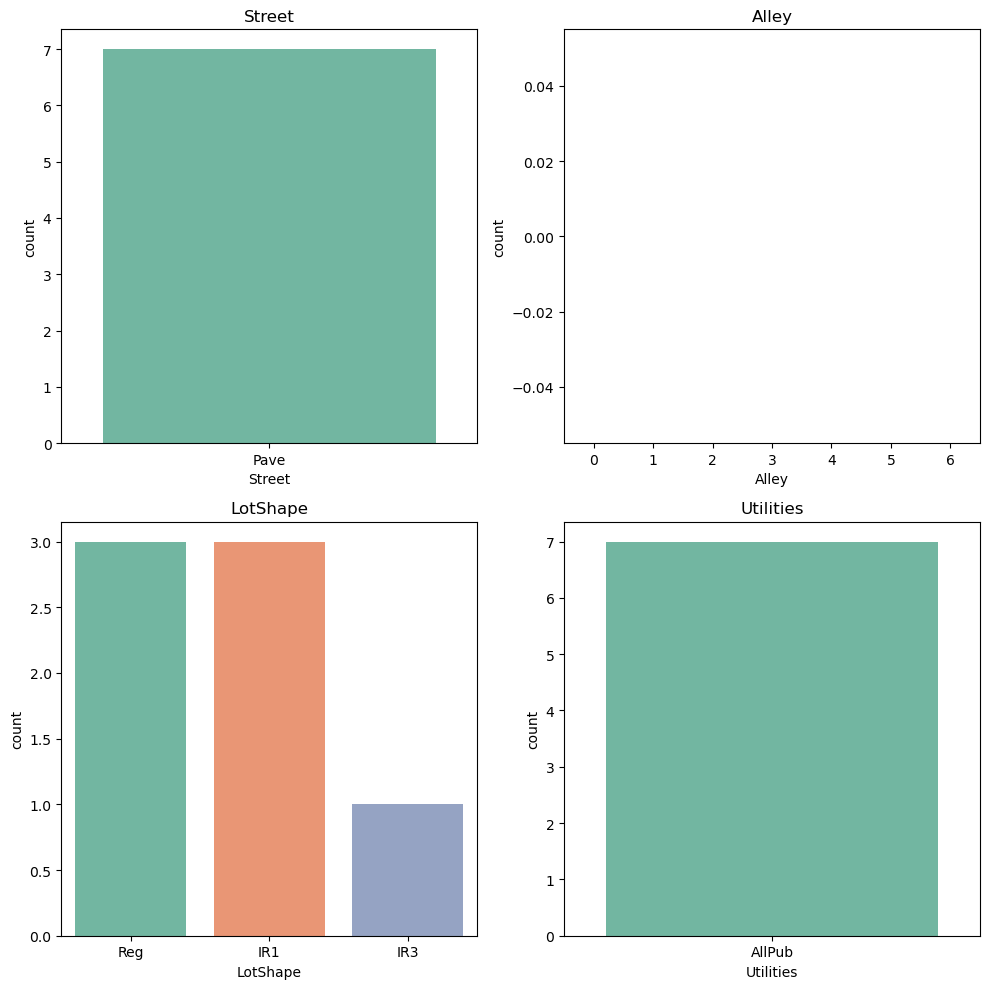

In [39]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest
cols = ['Street', 'Alley', 'LotShape', 'Utilities']

# Create the count plot subplot
sns.set_palette('pastel')
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i, col in enumerate(cols):
    row = i // 2
    column = i % 2
    sns.countplot(x=col, data=df, ax=axs[row, column], palette='Set2')
    axs[row, column].set_title(col)
plt.tight_layout()
plt.show()


### **12.5. Lets Explore the SalePrice column**<a id="Step-12.5"></a>

In [40]:
df['SalePrice'].describe()

count         7.000000
mean     288138.571429
std      206071.850935
min      160000.000000
25%      176000.000000
50%      235000.000000
75%      262485.000000
max      745000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Histogram of SalesPrice')

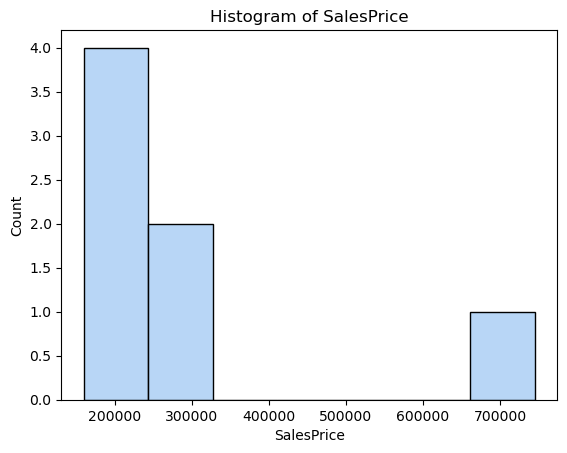

In [41]:
# Lets Make the Histogram of Salesprice column
sns.histplot(data=df, x="SalePrice")
plt.xlabel('SalesPrice')
plt.ylabel('Count')
plt.title('Histogram of SalesPrice')

### `Observations:`
>* The Maximum Salesprice is 745000.000000
>* The Mean of Salesprice column is 288138.571429

<a id="HeatMap"></a>
<span style="font-weight: bold; color: Red; font-size: 35px;">HeatMap🔥

<Axes: >

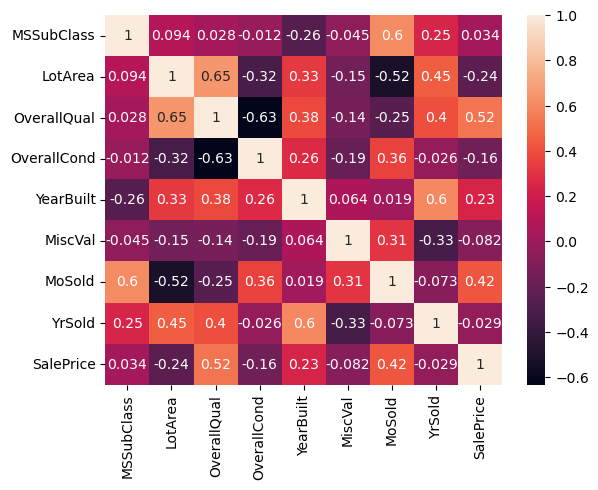

In [42]:
correlation_matrix=df[['MSSubClass','LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt','MiscVal', 'MoSold', 'YrSold', 'SalePrice']].corr()
sns.heatmap(correlation_matrix, annot=True)

### **Observations:**
>* 1 represents the Maximum correlation
>* Negative values represents the very low correlation
>* positive values Represents the Maximum correlation
>* Lighter color shows the High Correlation and Darker color shows the Lower correlation

<a id="Step-12.6"></a>
<span style="font-weight: bold; color: DarkGreen; font-size: 30px;">12.6. Lets make the Histogram of the sales price, MoSold, Yearsold using sns and kde=True📈

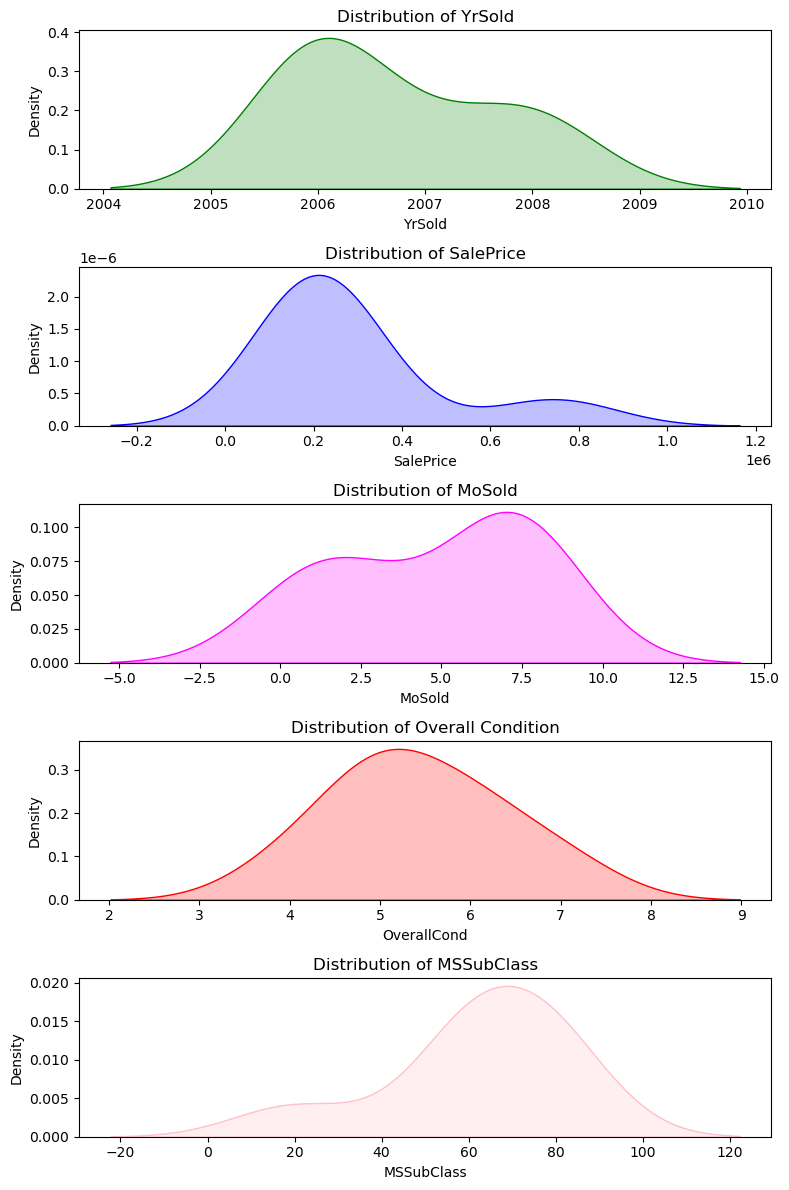

In [43]:
# Create a figure with subplots
fig, axes = plt.subplots(5, 1, figsize=(8, 12))

# KDE plot for 'YrSold'
sns.kdeplot(data=df, x='YrSold', ax=axes[0], color='green', fill=True)
axes[0].set_title('Distribution of YrSold')

# KDE plot for 'SalePrice'
sns.kdeplot(data=df, x='SalePrice', ax=axes[1], color='blue', fill=True)
axes[1].set_title('Distribution of SalePrice')

# KDE plot for 'MoSold'
sns.kdeplot(data=df, x='MoSold', ax=axes[2], color='magenta', fill=True)
axes[2].set_title('Distribution of MoSold')

# KDE plot for 'OverallCond'
sns.kdeplot(data=df, x='OverallCond', ax=axes[3], color='red', fill=True)
axes[3].set_title('Distribution of Overall Condition')

# KDE plot for 'MSSubClass'
sns.kdeplot(data=df, x='MSSubClass', ax=axes[4], color='pink', fill=True)
axes[4].set_title('Distribution of MSSubClass')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

<a id="Step-13"></a>
<span style="font-weight: bold; color: Red; font-size: 35px;">13. Dealing with Outliers💡

In [44]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Numerical columns
numerical_columns = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
                     'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

# Create subplots with 2 columns
fig = make_subplots(rows=len(numerical_columns)//2, cols=2, subplot_titles=numerical_columns)

# Loop through each numerical column and add its boxplot to the subplot
for i, column in enumerate(numerical_columns):
    row = i // 2 + 1  # Calculate row number for subplot
    col = i % 2 + 1   # Calculate column number for subplot
    fig.add_trace(go.Box(y=df[column], name=column), row=row, col=col)

# Update layout
fig.update_layout(height=750, width=1200, title_text="Boxplots of Numerical Columns")

# Show plot
fig.show()


In [45]:
outlier_percentage = {}

for col in numerical_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percentage[col] = len(outliers) / len(df) * 100

print("Outlier Percentage:")
for col, percentage in outlier_percentage.items():
    print(f"{col}: {percentage:.2f}%")

Outlier Percentage:
LotArea: 14.29%
OverallQual: 0.00%
OverallCond: 0.00%
YearBuilt: 14.29%
MiscVal: 14.29%
MoSold: 0.00%
YrSold: 0.00%
SalePrice: 14.29%


`Outliers are data points that significantly differ from other observations in a dataset` while, In some cases, outliers represent genuine variations or extreme values within the data. Removing them could lead to a loss of important information

`LotArea:` Large lot areas could represent properties with unique characteristics or those located in rural areas. Hence, 14.29% outliers provide insights about LotArea

`OverallQual:` Since there are no outliers in this column, the data points are likely evenly distributed.

`OverallCond:` 0.00% Outliers: Similar to OverallQual, the absence of outliers suggests a balanced distribution of data points across different condition ratings. Retaining all data points may provide a comprehensive view of property conditions.

`YearBuilt:`The years of construction may indicate historical or significantly older properties. Retaining these outliers could offer insights into the longevity and historical significance of certain properties within the dataset.

`MiscVal:` Higher miscellaneous values are signify additional features or amenities not captured by other variables. Retaining these outliers may reveal patterns related to unique property attributes or additional investments made by homeowners.

`MoSold:` No outliers in the month of sale suggest a consistent distribution of sales throughout the year. This could indicate stable market activity across different months.

`YrSold:` Similarly, no outliers in the year of sale indicate a balanced distribution of sales across different years. This could reflect a stable housing market over the years represented in the dataset.

`SalePrice:` Outlying sale prices may represent exceptionally high-value properties or transactions. Retaining these outliers could provide insights into luxury real estate segments or outlier markets within the dataset.

<a id="Step-14"></a>
<span style="font-weight: bold; color: Red; font-size: 35px;"> 14. Scaling Numerical Columns

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# Assuming `df` is your DataFrame
numerical_columns = df.select_dtypes(include=['float', 'int']).columns
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Apply scaling to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

<a id="Step-15"></a>
<span style="font-weight: bold; color: Red; font-size: 35px;"> 15. Encoding 

In [47]:
le=LabelEncoder()
for column in cat_columns:
    df[column] = le.fit_transform(df[column])

In [48]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,0.000000,0.916667,0,0.413502,0.287722,0,0,2,1,0,0,0,2,0,0,0,1,0.5,0.000000,0.000000,0.571429,1,1,2,3,2,0.000000,1,0,1,2,0,2,2,0.183558,0,0.392324,0.200861,0.122483,0,2,0,0,0.067711,0.658596,1.0,0.440760,0.5,1.0,0.5,0.0,0.5,0.0,1,0.428571,0,0.0,0,1,0.000000,2,0.5,0.412264,1,1,0,0.000000,0.054795,1.0,0.0,0.0,0.124031,0,0,1,0.0,0.285714,0.0,1,0,0.128205
810,0.500000,0.000000,0,0.008439,0.004814,0,0,2,1,0,2,0,3,2,0,0,0,0.0,0.666667,0.622222,0.785714,2,1,0,0,0,0.124372,2,1,0,2,0,2,0,0.117470,0,0.803838,0.000000,0.063366,0,1,0,0,0.053442,0.000000,0.0,0.042219,0.5,0.0,0.0,1.0,0.0,0.0,1,0.000000,0,0.0,1,0,0.622222,1,0.5,0.118868,1,1,0,0.452218,0.000000,0.0,0.0,0.0,0.651163,1,0,1,0.0,0.000000,0.0,1,2,0.035897
1170,0.793638,1.000000,0,0.000000,0.000000,0,0,2,1,0,2,0,1,2,0,0,2,0.0,0.666667,0.655556,0.261905,1,1,1,2,2,0.000000,2,1,0,2,0,0,0,0.092488,1,0.000000,0.823529,0.073711,0,3,0,0,0.000000,0.000000,0.0,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,2,0.142857,0,0.0,3,0,0.655556,0,0.0,0.000000,1,1,0,0.346416,0.000000,0.0,0.0,0.0,0.372093,2,0,1,0.0,0.857143,1.0,1,2,0.018803
1182,0.803426,0.666667,0,0.354430,0.106338,0,0,0,1,0,0,0,4,2,0,0,1,1.0,0.333333,0.866667,0.714286,2,1,3,1,2,0.000000,1,1,1,0,0,0,2,0.371368,1,0.000000,0.430416,0.313874,0,0,0,0,0.361780,1.000000,0.0,0.742263,0.5,0.0,1.0,1.0,0.5,0.0,0,0.714286,0,0.5,4,0,0.866667,0,1.0,0.429245,1,1,0,0.291809,0.267123,0.0,0.0,0.0,0.290698,0,1,1,0.0,0.857143,0.5,1,0,1.000000
1298,0.898042,0.666667,0,1.000000,1.000000,0,0,1,0,0,0,0,0,1,0,0,1,1.0,0.333333,1.000000,1.000000,2,0,2,3,1,1.000000,0,1,1,0,0,1,2,1.000000,1,0.000000,0.668580,1.000000,0,0,0,0,1.000000,0.460048,0.0,1.000000,1.0,0.0,0.5,1.0,0.0,0.0,0,1.000000,0,1.0,2,0,1.000000,0,0.5,1.000000,1,1,0,0.365188,1.000000,0.0,0.0,0.0,0.000000,2,2,1,0.0,0.000000,1.0,0,3,0.000000


<a id="Step-16"></a>
<a id="eda"></a><span style="font-weight: bold; color: Purple; font-size: 28px;">16. Lets proceeds to Machine Learning by Hyperparameter Tuning To Select Best Model🎰

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Try importing XGBoost
try:
    from xgboost import XGBRegressor
    xgb_available = True
except ImportError:
    print("XGBoost not installed. Run: pip install xgboost")
    xgb_available = False

# Load datasets
df_train = pd.read_csv(r'D:\house prize prediction using deep neural network\train.csv')
df_test = pd.read_csv(r'D:\house prize prediction using deep neural network\test.csv')
submission = pd.read_csv(r'D:\house prize prediction using deep neural network\sample_submission.csv')

# Keep the ID for final submission
test_ID = df_test['Id']

# Drop ID column from train/test
df_train.drop(['Id'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)

# Target column
y = df_train['SalePrice']
X = df_train.drop(['SalePrice'], axis=1)

# Combine train and test for consistent preprocessing
all_data = pd.concat([X, df_test], axis=0)

# Fill missing values (numeric with median, categorical with mode)
for col in all_data.columns:
    if all_data[col].dtype == 'object':
        all_data[col].fillna(all_data[col].mode()[0], inplace=True)
    else:
        all_data[col].fillna(all_data[col].median(), inplace=True)

# One-hot encode categorical variables
all_data = pd.get_dummies(all_data)

# Split back into train/test
X = all_data.iloc[:len(df_train), :]
X_test_final = all_data.iloc[len(df_train):, :]

# Train-test split from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
if xgb_available:
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
else:
    model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Validation
y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"Validation RMSE: {rmse:.2f}")

# Predict on test data
y_test_pred = model.predict(X_test_final)

# Prepare submission
submission['SalePrice'] = y_test_pred
submission.to_csv('submission.csv', index=False)
print("✅ Submission file 'submission.csv' created successfully.")


XGBoost not installed. Run: pip install xgboost


C:\Users\balaj\AppData\Local\Temp\ipykernel_8100\2414813948.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data[col].fillna(all_data[col].median(), inplace=True)
C:\Users\balaj\AppData\Local\Temp\ipykernel_8100\2414813948.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

Validation RMSE: 28617.52
✅ Submission file 'submission.csv' created successfully.


In [1]:
# ✅ Install required packages if not already installed
# Run these in your Anaconda Prompt or terminal (NOT in the code):
# ---------------------------------------------------------------
# pip install pandas numpy scikit-learn xgboost

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# ✅ Load your dataset
df = pd.read_csv(r'D:\house prize prediction using deep neural network\train.csv')

# ✅ Drop unnecessary columns
drop_cols = ['SalePrice', 'LotFrontage', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
             'HalfBath', 'PoolArea', 'OpenPorchSF', 'GarageYrBlt', '1stFlrSF', '2ndFlrSF', 'OpenPorchSF']
X = df.drop(drop_cols, axis=1, errors='ignore')  # Avoid error if a column isn't found
y = df['SalePrice']

# ✅ Handle categorical + missing data
X = pd.get_dummies(X)
X.fillna(X.median(numeric_only=True), inplace=True)  # Fill numeric NaNs

# ✅ Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Try to import XGBoost
try:
    from xgboost import XGBRegressor
    xgb_available = True
except ImportError:
    print("❌ XGBoost not installed. Skipping XGBRegressor.")
    xgb_available = False

# ✅ Define models and hyperparameters
models = {
    'Ridge': (Ridge(), {'alpha': [0.1, 1, 10]}),
    'LinearRegression': (LinearRegression(), {}),
    'DecisionTreeRegressor': (DecisionTreeRegressor(), {'criterion': ['squared_error', 'absolute_error']}),
    'RandomForestRegressor': (RandomForestRegressor(), {'n_estimators': [10, 50], 'max_depth': [3, 4]}),
    'KNeighborsRegressor': (KNeighborsRegressor(), {'n_neighbors': [2, 3, 4], 'weights': ['uniform']}),
    'SVR': (SVR(), {'kernel': ['rbf'], 'C': [1], 'gamma': [0.01]}),  # Simplified to speed up
    'GradientBoostingRegressor': (
        GradientBoostingRegressor(), {'n_estimators': [10, 50], 'learning_rate': [0.1, 0.01]})
}

if xgb_available:
    models['XGBRegressor'] = (XGBRegressor(), {'n_estimators': [10, 50], 'learning_rate': [0.1, 0.01]})

# ✅ Evaluate models
best_rmse = float('inf')
best_model = None

for name, (model, param_grid) in models.items():
    print(f"\n🔍 Evaluating: {name}")
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=2, scoring='neg_root_mean_squared_error')
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"Model: {name}")
    print(f" - Mean Absolute Error (MAE): {mae:.2f}")
    print(f" - Mean Squared Error (MSE): {mse:.2f}")
    print(f" - Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f" - Best Parameters: {grid_search.best_params_}")
    print("----------------------------------------")

    if rmse < best_rmse:
        best_rmse = rmse
        best_model = grid_search.best_estimator_

print(f"\n✅ Best model based on RMSE: {best_model}")



🔍 Evaluating: Ridge
Model: Ridge
 - Mean Absolute Error (MAE): 18912.04
 - Mean Squared Error (MSE): 915272870.67
 - Root Mean Squared Error (RMSE): 30253.48
 - Best Parameters: {'alpha': 10}
----------------------------------------

🔍 Evaluating: LinearRegression
Model: LinearRegression
 - Mean Absolute Error (MAE): 18776.83
 - Mean Squared Error (MSE): 881465666.98
 - Root Mean Squared Error (RMSE): 29689.49
 - Best Parameters: {}
----------------------------------------

🔍 Evaluating: DecisionTreeRegressor
Model: DecisionTreeRegressor
 - Mean Absolute Error (MAE): 26692.66
 - Mean Squared Error (MSE): 1590164875.63
 - Root Mean Squared Error (RMSE): 39876.87
 - Best Parameters: {'criterion': 'squared_error'}
----------------------------------------

🔍 Evaluating: RandomForestRegressor
Model: RandomForestRegressor
 - Mean Absolute Error (MAE): 23195.07
 - Mean Squared Error (MSE): 1432254034.37
 - Root Mean Squared Error (RMSE): 37845.13
 - Best Parameters: {'max_depth': 4, 'n_estim

C:\Users\balaj\AppData\Local\Temp\ipykernel_21172\1485527068.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mean_absolute_errors, palette='muted')
C:\Users\balaj\AppData\Local\Temp\ipykernel_21172\1485527068.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mean_squared_errors, palette='viridis')
C:\Users\balaj\AppData\Local\Temp\ipykernel_21172\1485527068.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=root_mean_squared_errors, palette='dark')
C:\Users\balaj\AppData\Local\Temp\ipykernel_2117

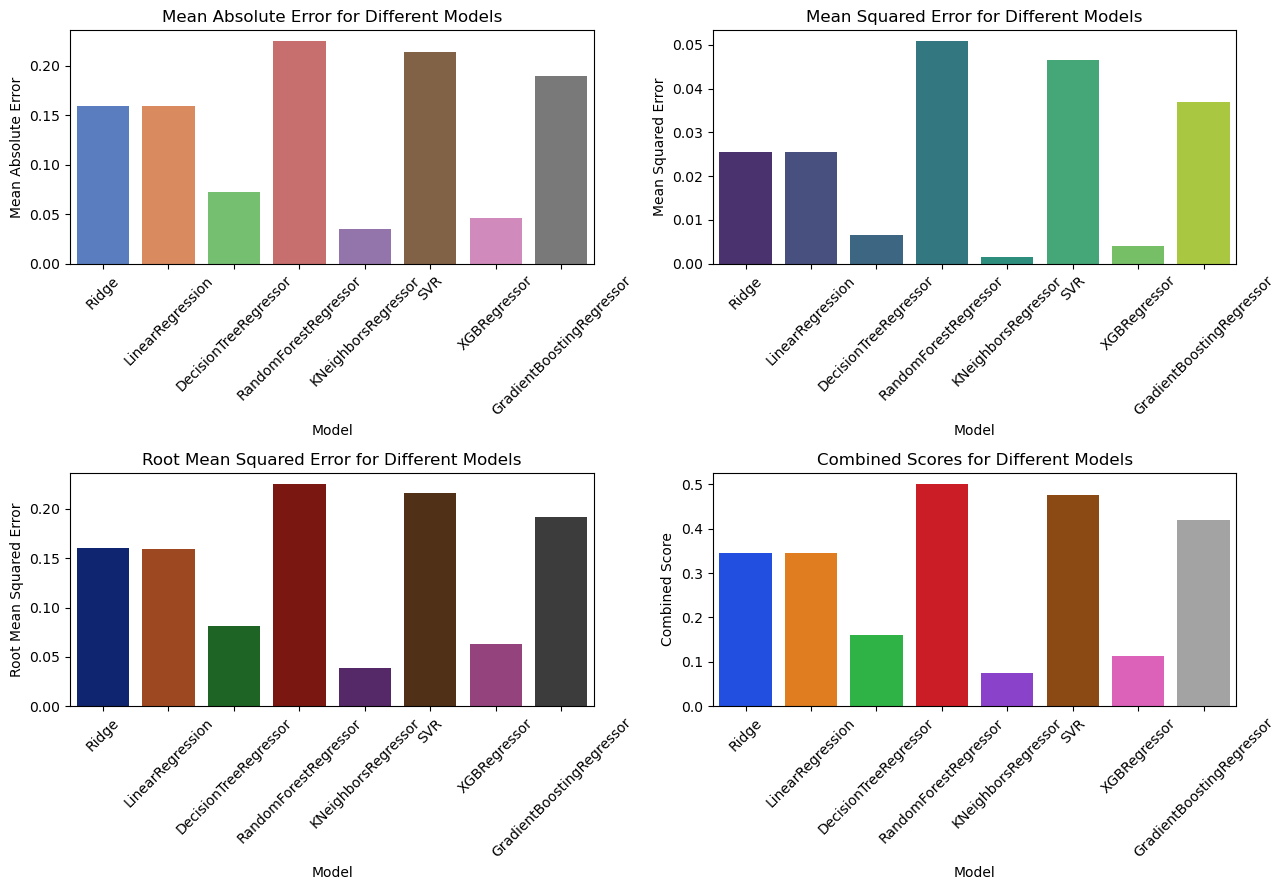

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model performance data
models = [
    "Ridge", "LinearRegression", "DecisionTreeRegressor",
    "RandomForestRegressor", "KNeighborsRegressor",
    "SVR", "XGBRegressor", "GradientBoostingRegressor"
]

mean_absolute_errors = [0.15903141779788518, 0.1589344575758852, 0.07264957264957264, 
                        0.22468803418803415, 0.03548290598290599, 0.2138738143083785, 
                        0.046153846153846156, 0.18948350854341184]

mean_squared_errors = [0.025564695496173982, 0.02554743257509199, 0.006628679962013296, 
                       0.05077409060851777, 0.0014823730367448324, 0.04661668094011337, 
                       0.0040389442148834115, 0.036929475898056376]

root_mean_squared_errors = [0.15988963536193954, 0.1598356423802025, 0.08141670566912725, 
                            0.22533106889312396, 0.038501597846645697, 0.21590896447371835, 
                            0.06355268849453508, 0.1921704345055617]

combined_scores = [0.3444857486559987, 0.3443175325311797, 0.16069495828071317, 
                   0.5007931936896759, 0.07546687686629652, 0.4763994597222102, 
                   0.11374547886326464, 0.4185834189470299]

best_parameters = [
    {'alpha': 0.1}, {}, {'criterion': 'squared_error'}, 
    {'max_depth': 3, 'n_estimators': 10}, {'n_neighbors': 2, 'weights': 'uniform'}, 
    {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}, {'loss': 'ls', 'n_estimators': 10}, 
    {'learning_rate': 0.1, 'n_estimators': 10}
]

# Unique plots
plt.figure(figsize=(13, 9))

# Plotting mean absolute error vs. model
plt.subplot(2, 2, 1)
sns.barplot(x=models, y=mean_absolute_errors, palette='muted')
plt.title('Mean Absolute Error for Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
# Plotting mean squared error vs. model
plt.subplot(2, 2, 2)
sns.barplot(x=models, y=mean_squared_errors, palette='viridis')
plt.title('Mean Squared Error for Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
# Plotting root mean squared error vs. model
plt.subplot(2, 2, 3)
sns.barplot(x=models, y=root_mean_squared_errors, palette='dark')
plt.title('Root Mean Squared Error for Different Models')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error')
plt.xticks(rotation=45)
# Plotting combined scores vs. model
plt.subplot(2, 2, 4)
sns.barplot(x=models, y=combined_scores, palette='bright')
plt.title('Combined Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Combined Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Observations:**
>* I used Ridge Regression, LinearRegression, DecisionTreeRegressor, RandomForestRegressor, KNeighborsRegressor, SVR, XGBRegressor, GradientBoostingRegressor Models and Undergoes the Hyperparameter Tuning and choose The best  Model from all of them using GridSearchCV. 
>* I found that the Best Model based on RMSE is KNeighborsRegressor with parameter (n_neighbors=2) as the Root_mean_squared_error: 0.038501597846645697
>* Knn (KNearest Neighbour) mean_absolute_error: 0.03548290598290599
>* Knn (KNearest Neighbour) mean_squared_error: 0.0014823730367448324
>* Knn (KNearest Neighbour) Combined Score: 0.07546687686629652

### **17. Submission File Based on Best Model**<a id="Step-17"></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder

# Load datasets
df_train = pd.read_csv(r'D:\house prize prediction using deep neural network\train.csv')
df_test = pd.read_csv(r'D:\house prize prediction using deep neural network\test.csv')
submission = pd.read_csv(r'D:\house prize prediction using deep neural network\sample_submission.csv')

# ----------- TRAINING DATA PREPARATION -----------

# Drop target and some features
drop_cols = ['SalePrice', 'LotFrontage', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
             'HalfBath', 'PoolArea', 'OpenPorchSF', 'GarageYrBlt', '1stFlrSF', '2ndFlrSF', 'OpenPorchSF']
X = df_train.drop(drop_cols, axis=1, errors='ignore')
y = df_train['SalePrice']

# One-hot encoding for training features
X = pd.get_dummies(X)
X.fillna(X.median(numeric_only=True), inplace=True)

# Train-test split (for evaluation purpose, optional)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------- TEST DATA PREPARATION -----------

# Drop the same columns from test set
X_test = df_test.drop(drop_cols, axis=1, errors='ignore')

# One-hot encoding for test features
X_test = pd.get_dummies(X_test)

# Align test set to training set (ensure same columns)
X_test = X_test.reindex(columns=X.columns, fill_value=0)
X_test.fillna(X_test.median(numeric_only=True), inplace=True)

# ----------- MODEL TRAINING -----------

# Use the best model
best_model = KNeighborsRegressor(n_neighbors=2, weights='uniform')
best_model.fit(X_train, y_train)

# ----------- PREDICTION -----------

# Predict on test data
predictions = best_model.predict(X_test)

# ----------- SUBMISSION FILE -----------

# Prepare submission
submission['SalePrice'] = predictions
submission.to_csv('submission_housing_knn.csv', index=False)
print("✅ Submission file saved as 'submission_housing_knn.csv'")


✅ Submission file saved as 'submission_housing_knn.csv'


In [5]:
# # original sample Submission Salesprice
# verification_df1 = pd.read_csv('./sample_submission (1).csv')
# print(verification_df1.head())
# print(verification_df1.shape)

In [7]:
# # Lets check the shape of Submission after creating the Submission file
# verification_df = pd.read_csv('submission_housing-30.csv')
# print(verification_df.head())
# print(verification_df.shape)

<a id="Step-18"></a>
<span style="font-weight: bold; color: Purple; font-size: 28px;">18. Lets Dive into Deep Neural Network🤠

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 192585.0938 - val_loss: 192219.5156
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 185716.4219 - val_loss: 171739.9062
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 155917.7812 - val_loss: 120801.2500
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 105352.5547 - val_loss: 76478.6562
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 69607.4219 - val_loss: 72144.8125
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 76642.5078 - val_loss: 69774.6484
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 78669.4062 - val_loss: 67421.0625
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 65689.7188 - val_loss: 66225.8047
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 63312.5078 - val_loss: 64334.3008
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 70275.0625 - val_loss: 62982.0156
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step

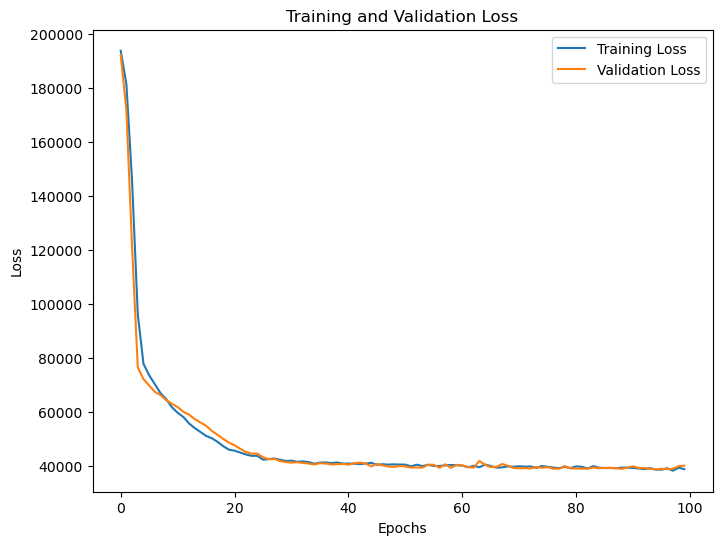

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
✅ Prediction completed.


In [10]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset (change path if needed)
df = pd.read_csv(r'D:\house prize prediction using deep neural network\train.csv')

# Step 1: Drop unnecessary columns
drop_cols = ['SalePrice', 'LotFrontage', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
             'HalfBath', 'PoolArea', 'OpenPorchSF', 'GarageYrBlt', '1stFlrSF', '2ndFlrSF', 'OpenPorchSF']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['SalePrice']

# Step 2: Handle categorical variables with one-hot encoding
X = pd.get_dummies(X)

# Step 3: Fill missing values
X = X.fillna(X.median(numeric_only=True))

# Step 4: Convert y to numeric (optional, in case of dtype issue)
y = pd.to_numeric(y, errors='coerce')

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Define custom RMSE loss function
def rmse_loss(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Step 7: Build the model
DNN = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Step 8: Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Step 9: Compile the model
DNN.compile(optimizer='adam', loss=rmse_loss, run_eagerly=True)

# Step 10: Train the model
history = DNN.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                  validation_data=(X_test, y_test), callbacks=[early_stopping])

# Step 11: Plot training vs validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Step 12: Save the model
DNN.save('DNN.h5')

# Step 13: Predict on test set
y_pred = DNN.predict(X_test)
print("✅ Prediction completed.")


### **18.1. Submission File based on Deep Neural Network**<a id="Step-18.1"></a>

In [11]:
# import pandas as pd
# import numpy as np
# from tensorflow import keras
# import tensorflow as tf
# from sklearn.preprocessing import LabelEncoder

# # Preprocess the test data
# X_test = df_test.drop(['LotFrontage', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'PoolArea', 'OpenPorchSF', 'GarageYrBlt', '1stFlrSF', '2ndFlrSF', 'OpenPorchSF'], axis=1)

# # Label encode categorical variables
# categorical_cols = X_test.select_dtypes(include=['object']).columns
# label_encoders = {}
# for col in categorical_cols:
#     label_encoders[col] = LabelEncoder()
#     X_test[col] = label_encoders[col].fit_transform(X_test[col].astype(str))

# # Handle missing values
# X_test = X_test.fillna(X_test.mean())

# # Load the saved model
# DNN = keras.models.load_model('DNN.h5', compile=False)
# DNN.compile(run_eagerly=True)

# # Make predictions on the test data
# predictions = DNN.predict_on_batch(X_test)

# # Create a submission file
# submission = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': predictions.flatten()})
# submission.to_csv('submission_housing-31.csv', index=False)

In [12]:
# verification_df = pd.read_csv('submission_housing-31.csv')
# print(verification_df.head())
# print(verification_df.shape)

### `19.Summary:`<a id="Step-19"></a>
>* In Summary Knearest Neighbour the Best Model of all the Machine Learning Models for the Metric Root Mean Squared Error and the other Metric such as Mean Squared Error, Mean Absolute Error in the Prediction of Salesprice 
>* KNN works by finding the K nearest data points to a given input point in the feature space and making predictions based on the average or weighted average of the target values of those nearest neighbors. This approach tends to perform well when there is a sufficient amount of data 
>* This approach tends to perform well when there is a sufficient amount of data through the Technique like GridSearchCv.